# Customer Segmentation Analysis
-by **Esther Reginald Yeboah**


## Project Task
By the end of this case study, you will be able to figure out the following;
1. Segment customers using a machine learning algorithm (KMeans Clustering) in
Python.
2. Who are your target customers with whom you can start your marketing
strategy?
3. How the marketing strategy works in the real world


## Importing Libraries.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")




## Data Exploration

In [2]:
data= pd.read_csv('Custdata_4.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [34]:
#let's confirm we are working with distinct customers here.
print(data['CustomerID'].value_counts().sum())

200


## Data Visualization

### Histograms

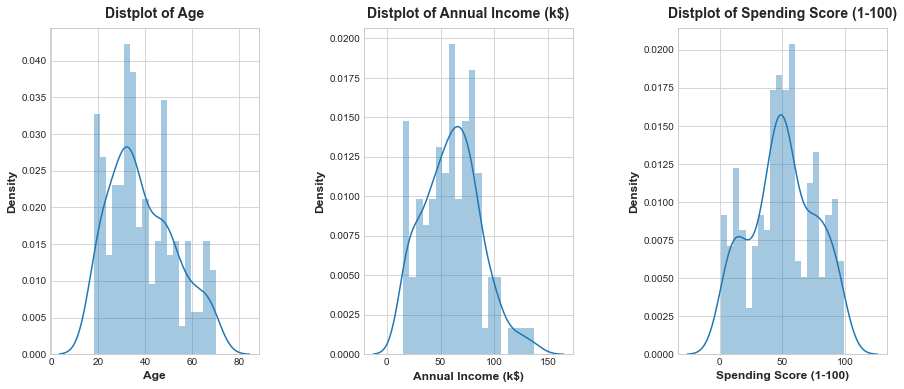

In [6]:
plt.figure(1 , figsize = (15 , 6))
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,)
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 20)
    plt.title(f'Distplot of {x}')
plt.show()

### Count Plot of Gender

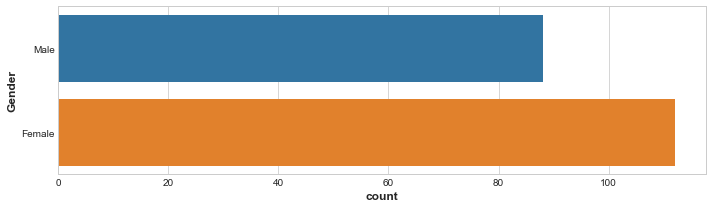

In [7]:
plt.figure(1 , figsize = (10 , 3))
sns.countplot(y = 'Gender' , data = data)
plt.show()

### Distribution of values in Age , Annual Income and Spending Score according to Gender

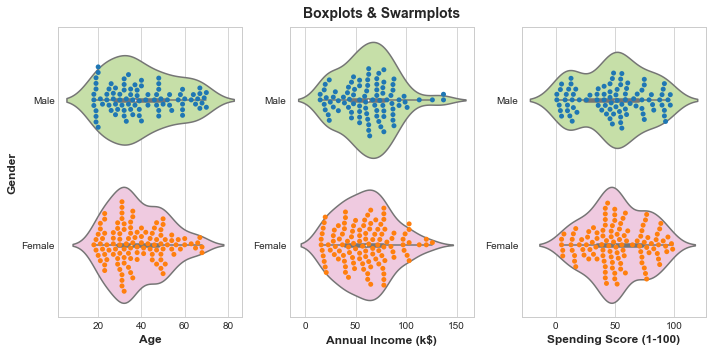

In [37]:
plt.figure(1 , figsize = (10,5))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = data , palette = 'PiYG_r')
    sns.swarmplot(x = cols , y = 'Gender' , data = data)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

## Clustering using K- means
### 1.Finding the best number of cluster

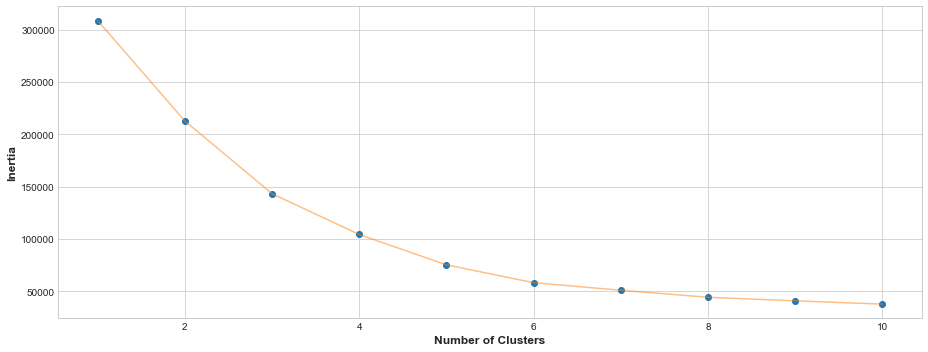

In [9]:
X = data.loc[:, ['Age','Annual Income (k$)', 'Spending Score (1-100)' ]]

X.head()
ks = range(1, 11)
inertia = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=k)
    
    # Fit model to samples
    kmeans.fit(X)
    
    
    # Append the inertia to the list of inertias
    inertia.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.figure(1 , figsize = (13 ,5))
plt.plot(ks , inertia , 'o')
plt.plot(ks , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()


### Adding the number of clusters to data

In [40]:
# Create cluster feature


kmeans = KMeans(n_clusters=5,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 45  , algorithm='elkan' )
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,3
1,21,15,81,2
2,20,16,6,3
3,23,16,77,2
4,31,17,40,3


### Plotting Clusters by Spending Score and Annual Income

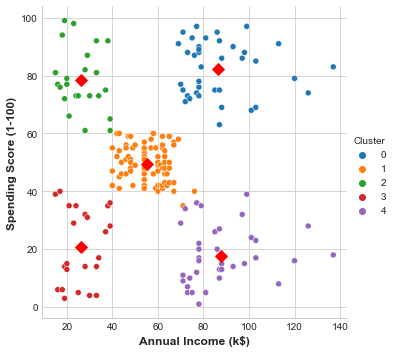

In [39]:
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", data=X, height=5,)
     

# Assign the cluster centers: centroids
centroids = kmeans.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,1]
centroids_y = centroids[:,2]

# Make a scatter plot of centroids_x and centroids_y

plt.scatter(centroids_x,centroids_y,marker ='D',s=70,c='red')
plt.show()

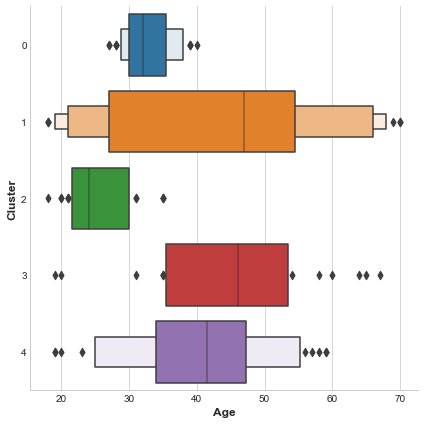

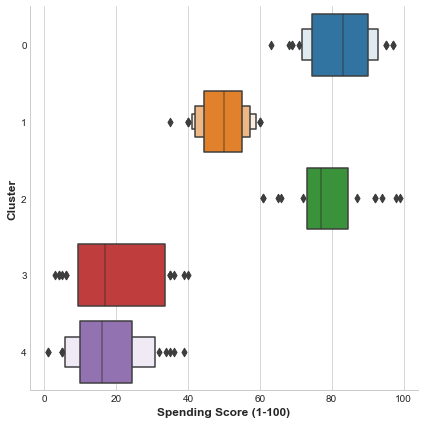

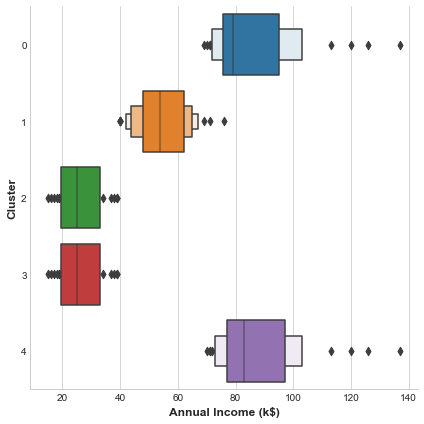

In [12]:
sns.catplot(x="Age", y="Cluster", data=X, kind="boxen", height=6)
sns.catplot(x="Spending Score (1-100)", y="Cluster", data=X, kind="boxen", height=6)
sns.catplot(x='Annual Income (k$)', y="Cluster", data=X, kind="boxen", height=6)
plt.show()

In [13]:
#let's getthe ID's of our target market based on the clustering we did

In [14]:
print(X['Cluster'].count())


200


### Now that we have our customers in segment,
Let's maually trace out these cutomers using their IDs

From the clusters we generated, customer with cluster label 0 are should be treated with most priority because, they have the capacityto spend and they have high spendig score, customers with label 2 are the next in line because, despite there low income, they have high spending score and lastly, customers with label 1; these customers are moderate spenders and there is a high posibility that they can do better with the right targetting.



In [15]:
#Adding cluster to the 
data["Cluster"]= X['Cluster']
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,3


In [16]:
customer_0,customer_1,customer_2,customer_3,customer_4= data[data['Cluster']==0],data[data['Cluster']==1],data[data['Cluster']==2],data[data['Cluster']==3],data[data['Cluster']==4]
customer_0.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
123,124,Male,39,69,91,0
125,126,Female,31,70,77,0
127,128,Male,40,71,95,0
129,130,Male,38,71,75,0
131,132,Male,39,71,75,0


In [17]:
customer_1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
46,47,Female,50,40,55,1
47,48,Female,27,40,47,1
48,49,Female,29,40,42,1
49,50,Female,31,40,42,1
50,51,Female,49,42,52,1


In [18]:
customer_2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
1,2,Male,21,15,81,2
3,4,Female,23,16,77,2
5,6,Female,22,17,76,2
7,8,Female,23,18,94,2
9,10,Female,30,19,72,2


In [19]:
customer_3.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
2,3,Female,20,16,6,3
4,5,Female,31,17,40,3
6,7,Female,35,18,6,3
8,9,Male,64,19,3,3


In [20]:
customer_4.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
124,125,Female,23,70,29,4
128,129,Male,59,71,11,4
130,131,Male,47,71,9,4
132,133,Female,25,72,34,4
134,135,Male,20,73,5,4


### Thank you for your attention